In [1]:
import yt
import os
import time
import h5py
import numpy as np
import pyfftw as ft
import matplotlib
import matplotlib.pyplot as plt
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse
from pyJHTDB import libJHTDB

In [2]:
N = 1024

In [3]:
start = time.time()

wiz = (b'(fftw-3.3.4 fftw_wisdom #x41ad5c95 #x159437f1 #x23fdee71 #xc6cf4464\n)\n', b'(fftw-3.3.4 fftwf_wisdom #xa84d9475 #xdb220970 #x4aa6f1c4 #xf3163254\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xe0177557 #xe9f32997 #xfb2dcb2c #xf8f70860)\n  (fftwf_dft_buffered_register 0 #x10bdd #x10bdd #x0 #x3eeb1978 #x428183dc #x2a84fbfa #xe4361ea0)\n  (fftwf_codelet_hc2cb_8 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x68ff47a8 #x21bb9e5b #xa20dc9bd #xd2485c0c)\n  (fftwf_codelet_r2cb_8 2 #x10bdd #x10bdd #x0 #x669a3813 #x9ba2bb21 #x64e8656d #x87c9de00)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #xee87b2d5 #x3e497607 #xfff1907f #xf9579a39)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x675249aa #x037557b8 #x14643a4b #x9ea626ef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x33c540f7 #x7207139c #x75ca3a4c #x748bc1b6)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x129e3b9a #xbe5c8c09 #x84314e36 #x92c09d6d)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #xc7a8d0be #x7798b669 #x9437b479 #x2ba791fc)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2b2a182d #x1a4f0eb8 #x4051bfc8 #x50ede16d)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x09558463 #xdea41841 #xf014e84a #x343a12e5)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf6040783 #x4ecac406 #x61d1e470 #xc372144f)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x37c7ab24 #x6b6a7433 #xbb43af76 #x9bd7720f)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xb5f6482a #x970cff75 #xad1e3938 #x526a74d7)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x4c6eda6a #xd64bb98a #xdeff4d47 #xbd9bc277)\n  (fftwf_rdft_rank0_register 2 #x11bdd #x11bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #x914f085b #x7945eab1 #xb24b3509 #x41ff886a)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x2d58151a #x7bf279ac #xd05075c9 #x05025c02)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x6e3f6b00 #xc631065b #xc5ce0991 #xc9e5830a)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #xbf36f96d #xc5099024 #xab4588dd #x0f71c101)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x2fdf6c57 #xa3a423cb #x3c83b16e #xd62995da)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #xee00c037 #x8d699089 #xad7ad6a0 #x4efaaf7d)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 2 #x10bdd #x10bdd #x0 #x104e8159 #x92ac0177 #x0f50339e #x2c4a57af)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_r2cb_128 0 #x10bdd #x10bdd #x0 #x673294cd #xe5b085a3 #xb8a774bf #xfd19dfb2)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_r2cbIII_8 2 #x10bdd #x10bdd #x0 #xfb67696a #x19d836b7 #x6b24c329 #xe4fc2e8b)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x1913d4ac #xf2d50866 #xc504d3dd #x76d5edcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x411f7a68 #x161cf1d6 #xbec2d98e #x7d9fdffa)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x23eb177d #x111d2c06 #xa78f35fb #xd56dcd76)\n)\n', b'(fftw-3.3.4 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_aws = ('(fftw-3.3.5 fftw_wisdom #x3c273403 #x192df114 #x4d08727c #xe98e9b9d\n)\n','(fftw-3.3.5 fftwf_wisdom #x706526c0 #x2f8b6c85 #x8cd1bb1a #x7c96e03d\n  (fftwf_codelet_n1fv_32_avx 0 #x10fdd #x10fdd #x0 #xd3a62617 #x8a0451dd #x42952706 #x6501219f)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb8bedcad #x45a4525b #xc44e4385 #xa637a3a4)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xf3c0402e #xf303d9aa #xbdc22798 #xd9510af9)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1a3fc773 #x16826a6d #x4ac1ba9b #x71705541)\n  (fftwf_codelet_hc2cf_16 0 #x11bdd #x11bdd #x0 #xa3aa3245 #xfa89ad84 #x6f51d136 #x21269ea8)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x9841df4f #xe400dd23 #xd6ec67a7 #x522d17d5)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x2a9ad576 #x6117ee04 #x58022324 #x6ed5dcef)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xea28ce24 #xc8cff39e #xa823c75f #x926c5590)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xecb29e47 #x03b3cd61 #xa27bbdd7 #xf1a239db)\n  (fftwf_dft_indirect_register 0 #x10fdd #x10fdd #x0 #x4708cf10 #x9dd6031e #x074d1f25 #xae61f28f)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x8676a7b7 #xe006c70d #x487b0278 #xb2f8f002)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x660a6630 #xc4ce3c6a #x62a726bb #x4f6728ee)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xc8ec6694 #xe750e6f2 #x3889104c #xec903173)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #xf6843763 #xe67a42c5 #x37896514 #x1934a686)\n  (fftwf_rdft_rank0_register 4 #x11bdd #x11bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x9382d45c #x3b4ef564 #x05a9af24 #x70bb1b32)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xb99abc38 #x8ead8d6b #xf0c5f1c4 #x54d4dbc2)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x519e2811 #xfd996521 #x222afcf1 #xa289f0a6)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x2ca97a7c #x1278c07a #x4b274fea #x63afcfcd)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf91e412c #xc1e62b4b #xb772f42b #x91524b5a)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x48259488 #x196c8c29 #x37f91b06 #x556264da)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x32025de0 #x37ce7b0a #x95c084dd #xcd18ab21)\n  (fftwf_codelet_t2fv_32_avx 0 #x10bdd #x10bdd #x0 #xcd08c9cd #xac2dabe6 #x0a6d47c5 #x5b07814f)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x1b302212 #x94fbdfad #xf5eb1b1e #x9cbc4116)\n  (fftwf_codelet_r2cf_64 0 #x11bdd #x11bdd #x0 #xfd689742 #x8cf30941 #x28dc0368 #x1d560726)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #x732a80e5 #xfdc1c3ba #xa26d2e2b #xc829547e)\n  (fftwf_codelet_n1bv_32_avx 0 #x10bdd #x10bdd #x0 #x308753a3 #xcc3d5e80 #xf64312e3 #xc698c209)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x7cf6cc98 #x1860681d #x04f92f92 #x64e3787b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xd84e4956 #xbbda597c #x4dcc8ca2 #x8135f48a)\n  (fftwf_dft_r2hc_register 0 #x10fdd #x10fdd #x0 #xf198bf27 #xb1c4fdb7 #xc76c5370 #xacd19ffe)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xb27d35ea #xa96ba975 #x4796bd74 #xae50e653)\n  (fftwf_codelet_t2fv_32_avx 0 #x10fdd #x10fdd #x0 #x1e5fa302 #x4dca4b4b #x68854fe7 #x57f745da)\n  (fftwf_codelet_r2cf_16 2 #x11bdd #x11bdd #x0 #x50d2f46f #x7308bf05 #x1e8d0b64 #x12981444)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #xbf8f2281 #x53d808d5 #x34ab52eb #x747f8bf4)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xdbd34cc3 #x010b1fae #x10e8d12b #x05b15faf)\n  (fftwf_codelet_t2bv_32_avx 0 #x10bdd #x10bdd #x0 #x354d5c68 #x9e923e23 #xcdb19ec8 #xc1743254)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #x245908be #x1b45c309 #xfa989829 #xe3448ecb)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xce1da3b2 #xb156b9ff #x345deb46 #x24967a68)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x54bf9035 #xa469d859 #x8c3af79c #xaabf7edf)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xca4b9bb9 #x447b7ee5 #xbb98516b #x49ee082c)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x938d7e18 #x1343c0de #xbe03a120 #x64e734a9)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #x79d37ad9 #x16113414 #xc645ea14 #x3dd1bbb5)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x1fe15182 #x5f3d421c #xba834eb6 #x2292df94)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf6b156b6 #x69706c05 #x3801e8c2 #xccec020e)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x38a08196 #x2a4ca72e #x2d1ba440 #x10600d8c)\n  (fftwf_codelet_r2cfII_16 2 #x11bdd #x11bdd #x0 #xf9dc5ef5 #xdbec3d0d #x0942416f #x9d652f91)\n  (fftwf_rdft_rank0_register 6 #x10fdd #x10fdd #x0 #x31fc48ea #x91190d4a #x7e381771 #xc41342ed)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x3c666628 #x01043fe7 #x20ba9e85 #x1f9b67a1)\n  (fftwf_codelet_n1_32 0 #x10bdd #x10bdd #x0 #x3c733b9d #xdcb5c493 #xea0b7ccc #x494a2eea)\n  (fftwf_dft_buffered_register 1 #x11bdd #x11bdd #x0 #xb6380734 #x8d827d8e #xdc067a28 #x4fc763de)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbd6b8262 #xabd0b6b7 #xe6ad6d03 #x628df7dc)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #xb7dce065 #x1bc70b3f #xefe0c473 #x60ae45b7)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9c0e3f58 #x928ea026 #xd28229a3 #x7246e0ac)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x89cb22ca #x6491b1a8 #xf5f7b0be #x3cd19d43)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x0478d9e6 #xffc458b2 #xefeba0c5 #xe8fb2e05)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #xdeee3024 #xbaceb843 #xf78f49d6 #x68b91457)\n)\n','(fftw-3.3.5 fftwl_wisdom #x0821b5c7 #xa4c07d5a #x21b58211 #xebe513ab\n)\n')
wiz_pan = ('(fftw-3.2.1 fftw_wisdom\n)\n','(fftw-3.2.1 fftwf_wisdom\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x17333d08 #x8edd80ef #xd6077aac #xc600dd9c)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x73597971 #x3f692c94 #x4eb3b585 #x3564fb02)\n  (fftwf_rdft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf7dbc32c #x7bfe8fd1 #x6225e3ae #x5bfec555)\n  (fftwf_rdft_rank0_register 4 #x10bdd #x10bdd #x0 #xd61ca6b8 #xcf472fa4 #x3e2ef447 #x247b9341)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x9de2bc1c #x7e18c7c7 #x0767b660 #xc8e91164)\n  (fftwf_codelet_r2cfII_8 2 #x11bdd #x11bdd #x0 #x32b1f8fc #x8d3c918b #xce98e177 #xa815f8d3)\n  (fftwf_codelet_t1_4 0 #x10fdd #x10fdd #x0 #xb8f247fc #xb8fa53ba #x7d5cec88 #x6a2cc555)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xc436ee45 #x996b8534 #x450db1a9 #x3a33c51d)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xf1402b7d #xa3a3a325 #x0d49574e #x0d09937f)\n  (fftwf_rdft2_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x9bb194d6 #xb68b63ce #xa13a7c23 #xe3107465)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x183a577e #xd7e3c62c #x4bcc0f2a #x233232bf)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x9258f3a7 #x005cd840 #xac58c76d #x068f56a8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xa20aa25d #x429ae7fd #x950f8f28 #xaadfce5f)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xbac9c1d4 #x0b224365 #x95e797f4 #xb6df2cc6)\n  (fftwf_codelet_hc2cb_16 0 #x10bdd #x10bdd #x0 #x5cf94f7b #xceb68dab #x52a6ba80 #xe8720c22)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x1d424cc9 #x1470a7e8 #x2c308c92 #x2e5655f7)\n  (fftwf_dft_nop_register 0 #x11bdd #x11bdd #x0 #x8769fcd3 #x4b8136bd #x6dd7e056 #x01df49de)\n  (fftwf_rdft2_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x4a598cec #xb55dae1c #xfcd414a6 #xee0420b9)\n  (fftwf_codelet_r2cb_64 0 #x10bdd #x10bdd #x0 #xb382453b #xbc6c1fa5 #x744be879 #x23932d1c)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x82b131d5 #xd5dc92f0 #x3d3ce22c #x960aebdf)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #xb8edb03a #x684adcba #x9166094e #x719ce4cb)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xc38de049 #x749dcc3a #x59c86a86 #xfac577ce)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #xefe16ed7 #xa13ffea6 #x4cb34c71 #x99e2609a)\n  (fftwf_rdft2_rank_geq2_register 0 #x11bdd #x11bdd #x0 #xc3987657 #xb038fe87 #xe47bb398 #x2198f783)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x6b55daf1 #xeedaa247 #x4169b219 #x471c6cb8)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x481d14e9 #xfc2b8a82 #x54aeff44 #xaf3c3eed)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x55be3aa3 #xcc62ed20 #x181f329a #xb93bf8ab)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #xc54b9597 #xcedcb6cf #x66549ead #xac0cbf09)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x3dc2df28 #x0e40a456 #x1c449577 #x34701e37)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x11559ac4 #xea86db86 #xad6ae8e4 #x97f477c6)\n  (fftwf_codelet_t1_16 0 #x10bdd #x10bdd #x0 #x444aa1ed #xbfa70e99 #x7fc3ef42 #x870daef5)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x5d8865dd #xf5555f1d #x98ed7615 #xb74f4ba5)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x3aee36ad #xf81507d9 #xaeec5eec #x4a1ae49f)\n  (fftwf_codelet_r2cf_8 2 #x11bdd #x11bdd #x0 #x0a076fcf #x7ab5a641 #xf8554cba #x6189532c)\n  (fftwf_codelet_n1_64 0 #x10fdd #x10fdd #x0 #x67697a12 #xefa46667 #x8b4f578f #x0ce1cd5d)\n  (fftwf_codelet_hc2cf_8 0 #x11bdd #x11bdd #x0 #x41be5f3a #x8e188182 #x0eb7a0fa #x9ec11807)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #x38de26f9 #x44ca4c7c #x1087bc01 #x2a7d4eb1)\n  (fftwf_rdft_rank0_register 3 #x10bdd #x10bdd #x0 #x91607aa1 #xd40dae11 #x01dbbb42 #x733d3911)\n  (fftwf_dft_buffered_register 1 #x10bdd #x10bdd #x0 #x6166df93 #x10ac3daa #x0d24c247 #x49d07678)\n  (fftwf_dft_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xf3a43230 #xb7930d1b #xd3d7b6f1 #xd3c540ea)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #xf5697fe5 #xd8d91ca2 #x330a4b69 #x4a1a71e7)\n  (fftwf_codelet_n1_64 0 #x10bdd #x10bdd #x0 #x57da8d92 #x4132851a #xcf3ba48c #xb978683f)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xd4112e8d #x84e09c74 #x042cb226 #xd0c4cb02)\n  (fftwf_codelet_q1_4 0 #x10fdd #x10fdd #x0 #x97d22b6b #xae1cc81d #x1852d0be #xff1c9eaa)\n  (fftwf_codelet_r2cf_128 0 #x11bdd #x11bdd #x0 #x97e393c8 #xca274e2c #x858e4556 #x684616d9)\n  (fftwf_dft_vrank_geq1_register 0 #x10fdd #x10fdd #x0 #x652b0af3 #x5b84278b #x24619407 #x33abea69)\n  (fftwf_dft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x3e80cd72 #xb96f0593 #x41719ae1 #x04050744)\n  (fftwf_rdft2_rank_geq2_register 0 #x10bdd #x10bdd #x0 #xa0828aee #x0e817d95 #x0c3ed3ee #xba4c0ed0)\n  (fftwf_codelet_r2cbIII_16 2 #x10bdd #x10bdd #x0 #xddf2f2fa #xc8d385c9 #x6320c8bd #x2f3e1787)\n  (fftwf_dft_r2hc_register 0 #x10bdd #x10bdd #x0 #x50162e2a #x8694ce40 #x3193fd9e #xfc0e6f61)\n  (fftwf_dft_indirect_register 0 #x10bdd #x10bdd #x0 #x03b795ae #x7dcb604a #xcc56a0cc #xadda128f)\n  (fftwf_codelet_r2cb_16 2 #x10bdd #x10bdd #x0 #xac5b56ae #x077b1817 #xa6535664 #xb320dcff)\n  (fftwf_dft_r2hc_register 0 #x11bdd #x11bdd #x0 #x17299a08 #x9580f3e7 #x6460b204 #x17a3e5ab)\n  (fftwf_rdft_rank0_register 3 #x11bdd #x11bdd #x0 #xd64a0b5d #x7770c64e #x091f6772 #x2554debc)\n  (fftwf_dft_buffered_register 0 #x11bdd #x11bdd #x0 #xf7502f16 #x7db69831 #xa46fa854 #x4433245b)\n  (fftwf_rdft2_thr_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #xacbf3294 #xd2efadfd #xbe85b16c #xd160c59b)\n  (fftwf_dft_nop_register 0 #x10bdd #x10bdd #x0 #x40a9cca4 #x0fdc336f #xc77c488a #x84c2c4cd)\n  (fftwf_dft_vrank_geq1_register 0 #x11bdd #x11bdd #x0 #x65c5d09a #x5f73b2db #x2236728c #x8776c413)\n  (fftwf_rdft_vrank_geq1_register 0 #x10bdd #x10bdd #x0 #x12bb431c #x62137a1e #x6dd1cb0f #x842691e8)\n)\n','(fftw-3.2.1 fftwl_wisdom\n)\n')
ft.import_wisdom(wiz)
S2 = np.zeros((N,N,N), dtype='float32')
fo = ft.zeros_aligned((N,N,N), dtype='float32')
bo = ft.zeros_aligned((N,N,N//2+1), dtype='complex64')
fft_object = ft.FFTW(fo,bo,axes=(0,1,2), direction='FFTW_FORWARD', flags=('FFTW_MEASURE', ),threads=8)
ifft_object = ft.FFTW(bo,fo,axes=(0,1,2), direction='FFTW_BACKWARD', flags=('FFTW_MEASURE', ),threads=8)

end = time.time()
print(end-start)

9.94744801521


In [4]:
start = time.time()

nproc = 8
nx = N//nproc

lS2 = ft.zeros_aligned((N//nproc,N,N), dtype='float32')

folder = '/home/idies/workspace/scratch'

for k in range(nproc):
    filename = 'ref-strainrate-'+str(k)+'.npz'
    file = folder+'/'+filename
    
    content = np.load(file)
    lS2[:,:,:] = content['S2']
    
    S2[k*nx:(k+1)*nx,:,:] = lS2[:,:,:]
    
end = time.time()
print(end-start)

25.480588913


In [5]:
del lS2

In [6]:
avg = np.average(S2)
print(avg)

249.219


In [7]:
chi = np.zeros((N,N,N))

In [8]:
chi[:,:,:] = 0
chi[S2>20*avg] = 1
chi[:,:,:] = chi[:,:,:]*S2[:,:,:]

In [9]:
chisl = chi[0+64:512+64,0:512,0:512] + 0.05*avg

In [10]:
data = dict(enstrophy = (chisl, "s**(-2)"))
bbox = np.array([[0,2*np.pi/4], [0,2*np.pi/4], [0,2*np.pi/4]])
ds = yt.load_uniform_grid(data, (512,512,512), length_unit="m", bbox=bbox, nprocs=8)

yt : [INFO     ] 2017-05-26 18:08:41,389 Parameters: current_time              = 0.0
yt : [INFO     ] 2017-05-26 18:08:41,391 Parameters: domain_dimensions         = [512 512 512]
yt : [INFO     ] 2017-05-26 18:08:41,395 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-05-26 18:08:41,397 Parameters: domain_right_edge         = [ 1.57079633  1.57079633  1.57079633]
yt : [INFO     ] 2017-05-26 18:08:41,400 Parameters: cosmological_simulation   = 0.0


In [11]:
S2min = np.min(chisl)
S2max = np.max(chisl)

yt : [INFO     ] 2017-05-26 18:21:34,137 Rendering scene (Can take a while).
yt : [INFO     ] 2017-05-26 18:21:34,159 Creating volume


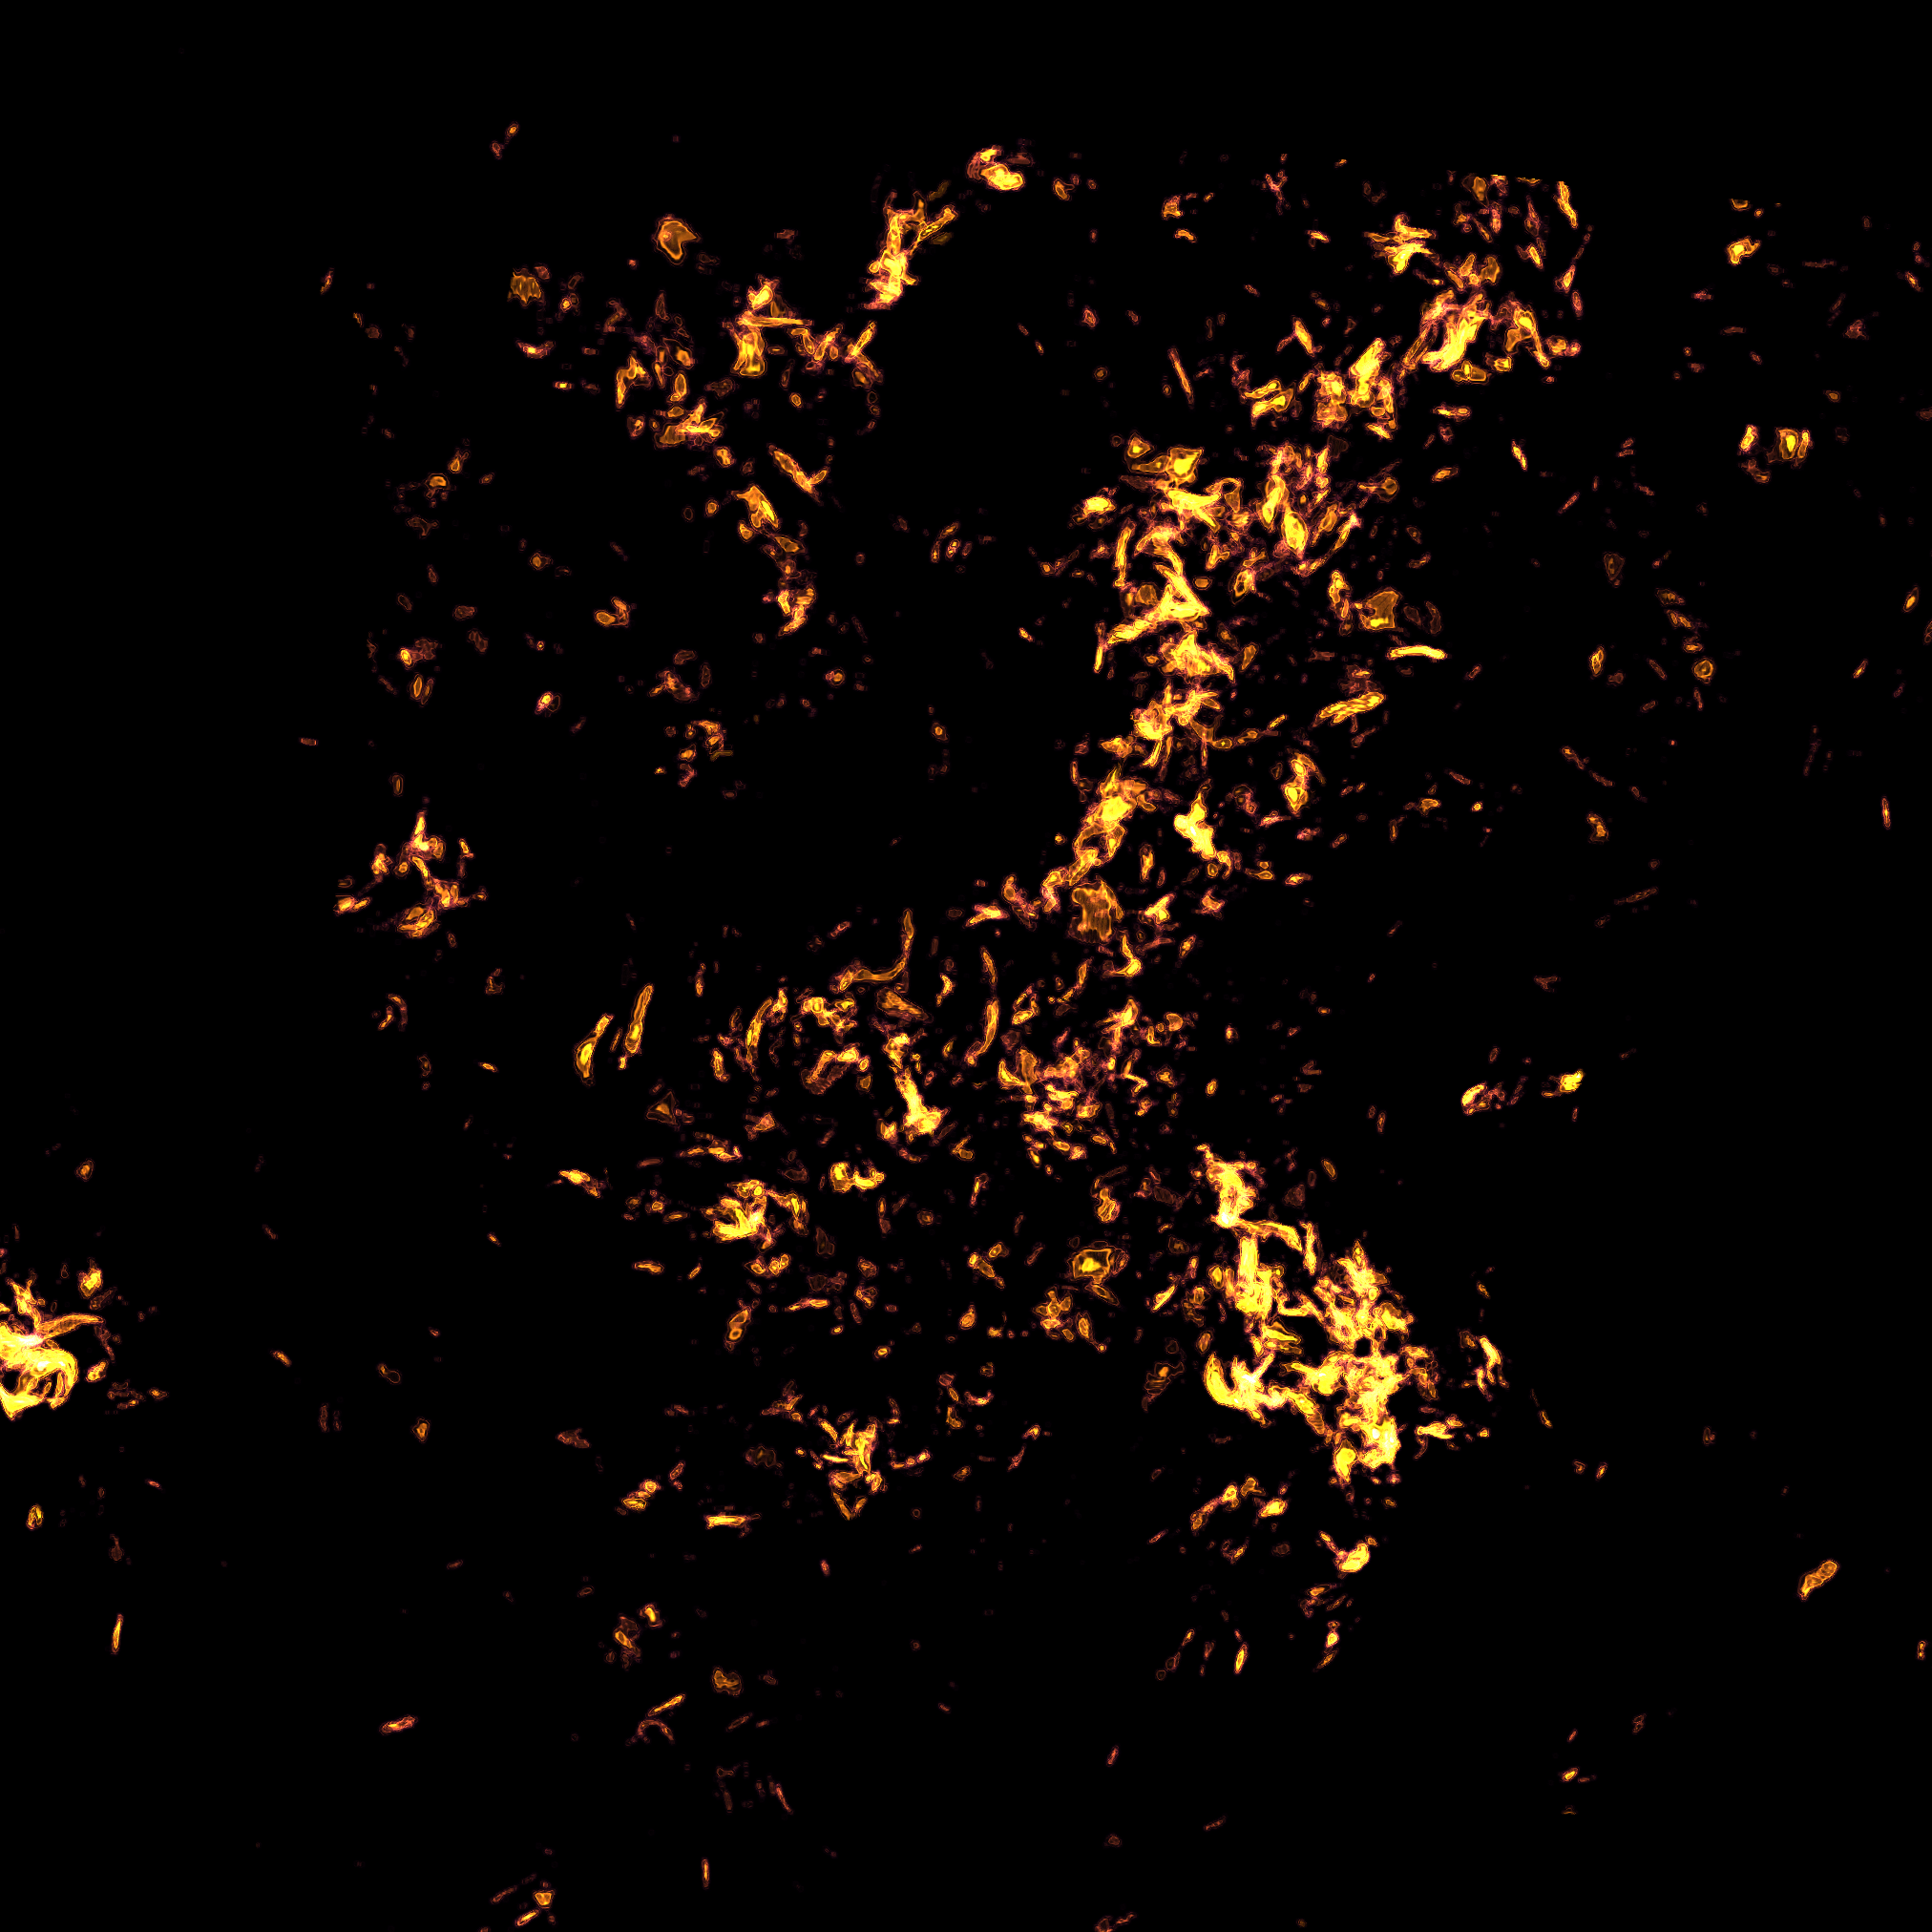

yt : [INFO     ] 2017-05-26 18:23:24,986 Rendering scene (Can take a while).
yt : [INFO     ] 2017-05-26 18:24:44,395 Saving render strainrate-volume-excursion-20.png


In [13]:
%matplotlib inline 

##############################################
### Create the base scene from the dataset ###
##############################################

sc = yt.create_scene(ds,'enstrophy', lens_type='perspective')

#############################################
### Camera, Focus and Orientation Options ###
#############################################

zom = 0.8
sc.camera.resolution = (2024, 2024)
sc.camera.set_position(np.array([-1.5*zom*(2*np.pi)/(4),0.0,1.5*zom*(2*np.pi)/(4)])) 

sc.camera.set_focus(ds.domain_center) 
#sc.camera.roll(0.5*np.pi/2)

sc.camera.zoom(2.4)

#########################################
### Transfer Function / Color Options ###
#########################################

source = sc[0]

tf = yt.ColorTransferFunction(np.log10((S2min,S2max)))
tf.add_layers(12, colormap='inferno')
source.tfh.tf = tf
source.tfh.bounds = (S2min,S2max)

source.tfh.set_log(True)
source.tfh.grey_opacity = False
source.tfh.plot('transfer_function.png',profile_field='enstrophy')

#######################################
### Showing and rendering the scene ###
#######################################

sc.show(sigma_clip=4.0)
sc.save('strainrate-volume-excursion-20.png',sigma_clip=2.0)

In [14]:
X = np.zeros((N,N,N))
Y = np.zeros((N,N,N))
Z = np.zeros((N,N,N))

In [15]:
start = time.time()

for i in range(N):
    X[i,:,:] = i*isotropic1024coarse['dx']
    
for j in range(N):
    Y[:,j,:] = j*isotropic1024coarse['dy']
    
for k in range(N):
    Z[:,:,k] = k*isotropic1024coarse['dz']

end = time.time()
print(end-start)

181.699908972


In [16]:
dx = 1/N
ner = int(512*np.sqrt(3))

r2 = np.zeros((N//2,N//2,N//2), dtype='float32')
iCorr = np.zeros((N//2,N//2,N//2), dtype='float32')
r2[:,:,:] = X[0:N//2,0:N//2,0:N//2]**2+Y[0:N//2,0:N//2,0:N//2]**2+Z[0:N//2,0:N//2,0:N//2]**2
r2rt = np.sqrt(r2)
minrt = np.min(r2rt)
maxrt = np.max(r2rt)
rbins = np.linspace(minrt,maxrt,1+ner)

In [17]:
start = time.time()

chi = np.zeros((N,N,N), dtype='float32')
cchi = ft.zeros_aligned((N,N,1+(N//2)), dtype='complex64')
corr = np.zeros((N,N,N),dtype='float32')

end = time.time()
print("time : "+str(end-start))

time : 13.7920629978


In [18]:
iCorr = np.zeros((N//2,N//2,N//2),dtype='float32')

In [20]:
start = time.time()

t=20

chi[:,:,:] = 0
chi[S2 > t*avg] = 1
    
fo[:,:,:] = chi[:,:,:]
fft_object.update_arrays(fo,bo)
fft_object.execute()
cchi[:,:,:] = bo[:,:,:]
    
tmp = cchi*(cchi.conj())
    
bo[:,:,:] = tmp[:,:,:]
ifft_object.update_arrays(bo,fo)
ifft_object.execute()
corr[:,:,:] = fo[:,:,:]/(N**3)
    
iCorr[0:(N//2),0:(N//2),0:(N//2)] = corr[0:(N//2),0:(N//2),0:(N//2)] 
    
corrLoc,redges = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins,weights=iCorr)
r2Loc,r2edges  = np.histogram(r2rt,range=(minrt,maxrt),bins = rbins)

end = time.time()
print("time : "+str(end-start))

time : 176.051331043


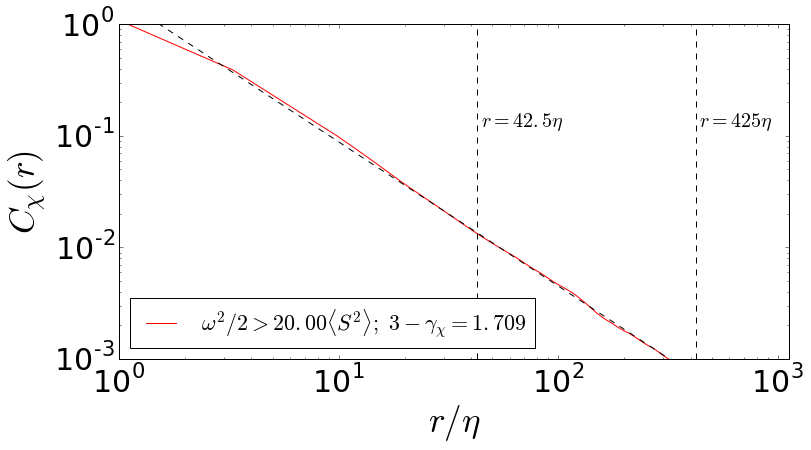

In [21]:
eta = 0.00280

c  = ['r','g','b','m','c','y','r','g','b']

matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

rbins = np.linspace(minrt,maxrt,1+ner)

bins = (rbins[0:ner]+rbins[1:ner+1])/2
tempRp = bins[(bins/eta>42.5)&(bins/eta<425)]/eta

plt.figure(figsize=(12,6))
plt.xlabel(r'$r/\eta$', fontsize=35)
plt.ylabel(r'$C_\chi(r)$', fontsize=35)
plt.xlim([1,np.pi/eta])
plt.ylim([10**(-3),10**(0)])
#plt.grid()
    
corrF = corrLoc/r2Loc
tempCorrF = corrF[(bins/eta>42.5)&(bins/eta<425)]
    
fit = np.polyfit(np.log(tempRp),np.log(tempCorrF/corrF[0]),1)
plt.loglog(bins/eta,(corrF)/(corrF[0]),'r',label=r'$ \omega^2/2 > {two:.2f}\langle S^2\rangle;\ 3-\gamma_\chi = {three:.3f}$'.format(two=t,three=3+fit[0]))
plt.loglog(bins/eta,np.exp(fit[1])*((bins/eta)**(fit[0])),'k--')
    
plt.axvline(x=42.50, color='k', linestyle='--')
plt.axvline(x=425.0, color='k', linestyle='--')
plt.text(44.5, 0.12, r'$r = 42.5\eta$', fontsize=20)
plt.text(435., 0.12, r'$r = 425\eta$', fontsize=20)
plt.legend(loc='lower left',prop={'size':22})
plt.savefig('twopoint-strainrate-excursion-20.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [22]:
scales = []
BoxL = isotropic1024coarse['lx']
x0 = y0 = z0 = 0.

L = BoxL/2.

x1 = x0+isotropic1024coarse['lx']
y1 = y0+isotropic1024coarse['ly']
z1 = z0+isotropic1024coarse['lz']

nx = int((x1-x0)/L)+1
ny = int((y1-y0)/L)+1
nz = int((z1-z0)/L)+1

x1 = x0 + nx*L
y1 = y0 + ny*L 
z1 = z0 + nz*L

In [24]:
print("t = ",t)
Xs = X[S2 > t*avg]
Ys = Y[S2 > t*avg]
Zs = Z[S2 > t*avg]

('t = ', 20)


In [25]:
eta = 0.00287
hist = np.zeros((Xs.shape[0],3))
scales = np.logspace(np.log(2*425*eta),np.log(0.1*42.5*eta), num=250, endpoint=True, base=np.e)

In [26]:
hist[:,0] = Xs[:]
hist[:,1] = Ys[:]
hist[:,2] = Zs[:]

start0 = time.time()

count = []
for L in scales:
    start = time.time()
    
    x1 = x0+isotropic1024coarse['lx']
    y1 = y0+isotropic1024coarse['ly']
    z1 = z0+isotropic1024coarse['lz']
    
    nx = int((x1-x0)/L)+1
    ny = int((y1-y0)/L)+1
    nz = int((z1-z0)/L)+1
    
    x1 = x0 + nx*L
    y1 = y0 + ny*L 
    z1 = z0 + nz*L
    
    H, edges = np.histogramdd(hist, bins=(nx,ny,nz), range=((x0,x1),(y0,y1),(z0,z1)), normed=True)
    
    Hn = H[:]
    Hn[Hn>0] = 1
    numBox = np.sum(Hn)
    
    count.append(numBox)
    end = time.time()
    
end0 = time.time()
print("Total = ",end0-start0)

('Total = ', 206.20275592803955)


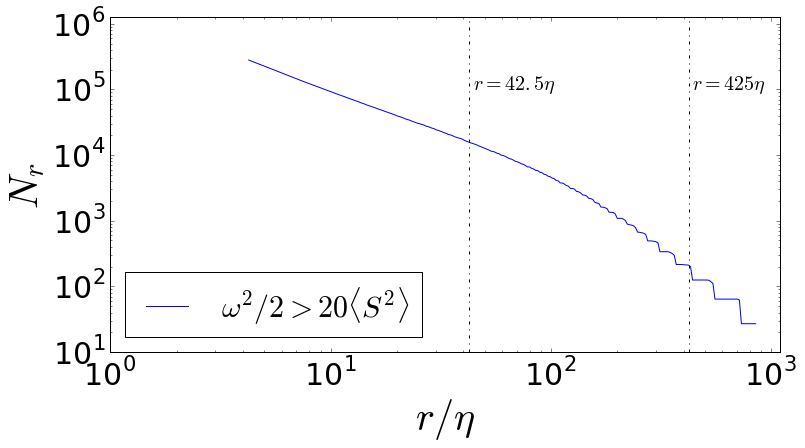

In [27]:
scales = np.array(scales)
count = np.array(count)

fig = plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=40)
plt.ylabel(r'$N_r$',size=40)
plt.xlim([1,np.pi/eta])
plt.ylim([10**(1),10**6.1])

idx = scales<20.*eta
Idx = scales>450.*eta

fit = np.polyfit(np.log(scales[idx]),np.log(count[idx]),1)    
Fit = np.polyfit(np.log(scales[Idx]),np.log(count[Idx]),1)
    
plt.loglog(scales/eta,count,'-',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $'.format(t,-fit[0],-Fit[0]))

plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**5, r'$r = 42.5\eta$', fontsize=20)
plt.text(435., 10**5, r'$r = 425\eta$', fontsize=20)
plt.legend(loc='lower left',prop={'size':30},ncol=2)
plt.savefig('boxcount-strainrate-excursion-20.pdf', format='pdf', bbox_inches='tight', transparent=True)

In [28]:
scales = []
BoxL = isotropic1024coarse['lx']
x0 = y0 = z0 = 0.

L = BoxL/2.

x1 = x0+isotropic1024coarse['lx']
y1 = y0+isotropic1024coarse['ly']
z1 = z0+isotropic1024coarse['lz']

nx = int((x1-x0)/L)+1
ny = int((y1-y0)/L)+1
nz = int((z1-z0)/L)+1

x1 = x0 + nx*L
y1 = y0 + ny*L 
z1 = z0 + nz*L

In [29]:
eta = 0.00287
hist = np.zeros((Xs.shape[0],3))
scales = np.logspace(np.log(2*425*eta),np.log(0.1*42.5*eta), num=250, endpoint=True, base=np.e)

In [30]:
hist[:,0] = Xs[:]
hist[:,1] = Ys[:]
hist[:,2] = Zs[:]

start0 = time.time()

count = []
for L in scales:
    start = time.time()
    
    x1 = x0+isotropic1024coarse['lx']
    y1 = y0+isotropic1024coarse['ly']
    z1 = z0+isotropic1024coarse['lz']
    
    nx = int((x1-x0)/L)+1
    ny = int((y1-y0)/L)+1
    nz = int((z1-z0)/L)+1
    
    x1 = x0 + nx*L
    y1 = y0 + ny*L 
    z1 = z0 + nz*L
    
    H, edges = np.histogramdd(hist, bins=(nx,ny,nz), range=((x0,x1),(y0,y1),(z0,z1)), normed=True)
               
    Hn = H[:,:,:]
    Sn = H[:,:,:]
    Bn = H[:,:,:]
    ###############################################################
    # Here is where boxcouting and correlation dimension differs. #
    ###############################################################
    Bn[Bn>0] = 1
    numBox = np.sum(Bn)
    numPts = np.sum(Sn)
    Hn[:,:,:] = Hn[:,:,:]/(numPts)
    corrBox = np.sum(Hn**2)
    ###############################################################
    gbox = np.zeros(1,dtype='float32')
    gbox[0] = corrBox
    gbox = gbox[0]#/numBox
    ###############################################################
    count.append(gbox)
        
    end = time.time()
    
end0 = time.time()
print("Total = ",end0-start0)

('Total = ', 261.1948299407959)


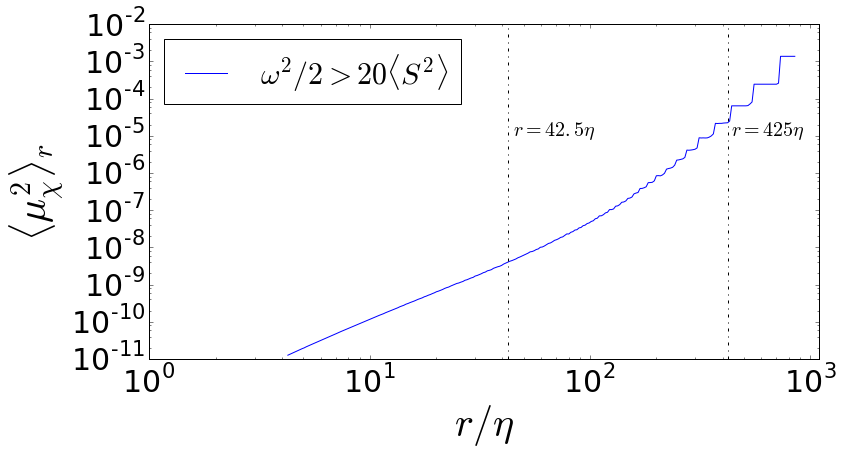

In [31]:
scales = np.array(scales)
count = np.array(count)

fig = plt.figure(figsize=(12,6))
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30)      
plt.xlabel(r'$r/\eta$',size=40)
plt.ylabel(r'$\langle \mu^2_\chi\rangle_r$',size=40)
plt.xlim([1,np.pi/eta])
#plt.ylim([10**(-6),10**(-1)])

idx = scales<20.*eta
Idx = scales>450.*eta

fit = np.polyfit(np.log(scales[idx]),np.log(count[idx]),1)    
Fit = np.polyfit(np.log(scales[Idx]),np.log(count[Idx]),1)
    
plt.loglog(scales/eta,count,'-',label=r'$\omega^2/2 > {:6.0f}\langle S^2\rangle $'.format(t,-fit[0],-Fit[0]))

plt.axvline(x=42.5,color='k', linestyle='-.')
plt.axvline(x=425.,color='k', linestyle='-.')
plt.text(44.5, 10**(-5), r'$r = 42.5\eta$', fontsize=20)
plt.text(435., 10**(-5), r'$r = 425\eta$', fontsize=20)
plt.legend(loc='upper left',prop={'size':30},ncol=2)
plt.savefig('boxcount-correlation-strainrate-excursion-20.pdf', format='pdf', bbox_inches='tight', transparent=True)